## Data 200 - Midterm Project ( Sentiment Analysis on YouTube Comments )

Author:    Aryan Jain    
                Rupesh Rangwani 
                Micah Billington
                Devesh Talreja

Date:   27th Feb, 2024 

##   Summary of Contents

This Midterm Project contains the following sections :

        1.   Introduction
        2.  Data Retrieval & Data Cleaning
        3.  Data Preprocessing
        4.  Exploratory Data Analysis
        5.  Data Visualization

# 1.  Introduction

<img src="image-20240227-175722.png" width="" align="" />

- In this exploratory data analysis project, sentiment and viewer engagement on YouTube will be compared and analyzed between the US and UK regions. The datasets that were utilized include YouTube comments from videos that the US and UK were trending during a certain period.

- The objective is to extract insights from the comment data by applying methods such as sentiment analysis, aggregation, correlation analysis, and data visualization. The volume of comments, the distribution of comment lengths, the distribution of likes and replies, the general mood, and the connections between various engagement metrics are important comparison points.

- By the end, we want to have a better knowledge of how viewer engagement trends and sentiment in comments vary or coincide between the US and the UK. This can offer insightful information to content producers who want to enhance audience engagement and targeting.

- Research Question: How can sentiment analysis of YouTube video comments improve online content interaction in the US and UK?

- The full notebook and datasets can be found on GitHub: https://github.com/RupeshRang95/Sentiment_Analysis_Youtube

# 2.  Data Retrieval & Data Cleaning

### 2.1     Importing Libraries

In [1]:
!pip install emoji==2.10.1


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import random
import emoji
from collections import Counter

### 2.2    Data Retrieval & Data Cleaning

Dataset: Use this link ("https://www.kaggle.com/datasets/datasnaek/youtube?select=UScomments.csv")

In [3]:
US_comments = pd.read_csv('UScomments.csv', on_bad_lines='skip', dtype={2: str, 3: str})
UK_comments = pd.read_csv('GBcomments.csv', on_bad_lines='skip', dtype={2: str, 3: str})
US_videos = pd.read_csv('USvideos.csv', on_bad_lines='skip')
UK_videos = pd.read_csv('GBvideos.csv',on_bad_lines='skip')

# Adjusted the sampling to not exceed the loaded data size
US_comments = US_comments.sample(n=min(100000, len(US_comments)), random_state=1)
UK_comments = UK_comments.sample(n=min(100000, len(UK_comments)), random_state=1)
US_videos = US_videos.sample(n=min(100000, len(US_videos)), random_state=1)
UK_videos = UK_videos.sample(n=min(100000, len(UK_videos)), random_state=1)


In [4]:
US_comments.head(5)

,video_id,comment_text,likes,replies
508535,iTRWe2XGEGA,It's a dog.......... And this video has been u...,0,0
526023,cXQUObfBXYk,Adam is such a nerd. I'm so jelly of his nerdn...,0,0
348022,mSYEzJ7LM54,Das macht neuer auch pfffff,0,0
624833,_Jn3urgf7zg,Yes,0,0
404834,VFM0UqX9MJ8,Bad acting confirmed :(,0,0


In [5]:
UK_comments.head(5)

,video_id,comment_text,likes,replies
71780,krNNMFpA1wY,A FUCKING BOPPP EVERYBODY YAAASSS,0,0
346297,UNSOt_ij8E4,💖 Ahah! We listen to the same music. So glad! ...,0,0
419044,69mJfm0MZKU,"🇧🇷✨👑♥️🎶 An anthem of this beast, queen",0,0
501679,hRRnKJwbrcw,muchluv,0,0
83860,YrTKLZi6rqk,Not in the basement 😂😂,9,0


Sentiment Words From: https://gist.github.com/mkulakowski2/4289441 & https://gist.github.com/mkulakowski2/4289437

Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
       Proceedings of the ACM SIGKDD International Conference on Knowledge 
       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
       Washington, USA, 
Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
       and Comparing Opinions on the Web." Proceedings of the 14th 
       International World Wide Web conference (WWW-2005), May 10-14, 
       2005, Chiba, Japan.

In [6]:
# define lists of positive and negative words -> opening the file in read mode 

# Negative words
f = open("negative-words.txt", "r") 
  
# reading the file 
data = f.read() 

negative_words = data.replace('\n', ',').split(",") 
del negative_words[0:50]
f.close() 

# Positive words
f = open("positive-words.txt", "r") 
  
# reading the file 
data = f.read() 

positive_words = data.replace('\n', ',').split(",") 
del positive_words[0:50]
f.close() 
print(f'Positive Words: {positive_words}')
print(f'Negative Words: {negative_words}')

Positive Words: ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 

## 3.  Data Preprocessing

### 3.1   Regex Application

Regex expression to match emojis

In [7]:
emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+", flags=re.UNICODE)

Grouping US and UK comments

In [8]:
US_comments['emojis'] = US_comments['comment_text'].apply(lambda text: emoji_pattern.findall(str(text)))
UK_comments['emojis'] = UK_comments['comment_text'].apply(lambda text: emoji_pattern.findall(str(text)))

Counting emojis used in US and UK comments

In [9]:
us_emoji_counts = Counter([emoji for sublist in US_comments['emojis'] for emoji in sublist])
uk_emoji_counts = Counter([emoji for sublist in UK_comments['emojis'] for emoji in sublist])

Combing US and UK emoji counts

In [10]:
combined_emoji_counts = us_emoji_counts + uk_emoji_counts

Filtering out to top 10 emojis used

In [11]:
top_emojis = combined_emoji_counts.most_common(10)

Zipping it out

In [12]:
emojis, counts = zip(*top_emojis)

Plotting the result

/shared-libs/python3.11/py-core/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


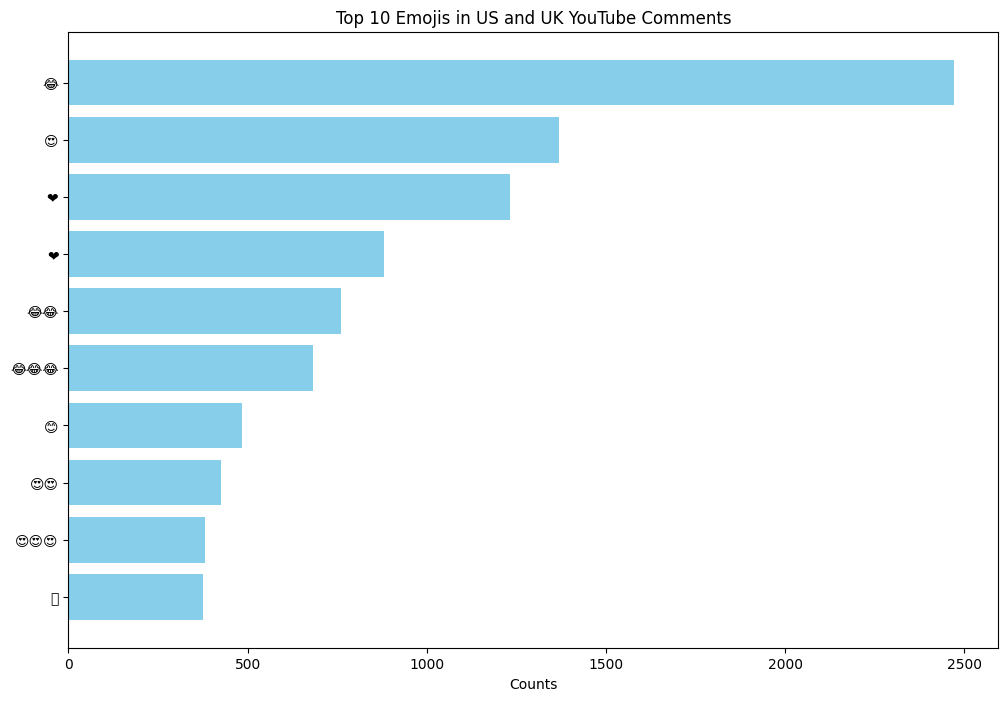

In [13]:
plt.figure(figsize=(12, 8))
plt.barh(emojis, counts, color='skyblue')
plt.xlabel('Counts')
plt.title('Top 10 Emojis in US and UK YouTube Comments')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

The graph above displays positive sentiments expressed in YouTube comments in the US and UK combined. Since the most popular emojis are positive comments overall the use of emojis seems to be positive. It could also be that most comments are positive in general.


Cleans 'comment_text' in both DataFrames, converting to lowercase and replacing non-alphabets with a space

In [14]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x: re.sub(r"[^a-zA-Z']", ' ', x.lower()) if isinstance(x, str) else x)
UK_comments['comment_text'] = UK_comments['comment_text'].apply(lambda x: re.sub(r"[^a-zA-Z']", ' ', x.lower()) if isinstance(x, str) else x)

### 3.2  Merging Datasets


Merging 'US_comments' with 'US_videos' and 'UK_comments' with 'UK_videos' dataframes based on 'video_id'

In [15]:
us_data = pd.merge(US_comments, US_videos, on='video_id')
uk_data = pd.merge(UK_comments, UK_videos, on='video_id')

In [16]:
Merged = pd.merge(US_comments, UK_comments, how="inner", on="video_id", suffixes=('_US','_UK'))
Merged.head()

,video_id,comment_text_US,likes_US,replies_US,emojis_US,comment_text_UK,likes_UK,replies_UK,emojis_UK
0,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],aww that's cute but scary at the same time,0,0,[]
1,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],screw you guys for messing with the poor dog y...,0,0,[]
2,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],maybe the wolf is a spirit or guardian angel ...,1,0,[]
3,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],filipinos,0,0,[]
4,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],this is apparently not a wolf but a pet dog m...,1,0,[]


# 4.  Exploratory Data Analysis

### 4.1    Video Engagement Analysis


Analyzing Video Engagement in the US and UK

In [17]:
# Number of unique videos in the US
num_unique_videos_us = us_data['video_id'].nunique()
print(f"Number of unique videos in the US: {num_unique_videos_us}")

# Number of unique videos in the UK
num_unique_videos_uk = uk_data['video_id'].nunique()
print(f"Number of unique videos in the UK: {num_unique_videos_uk}")

# Average number of comments per video in the US
avg_comments_per_video_us = us_data.groupby('video_id')['comment_text'].count().mean()
print(f"Average number of comments per video in the US: {avg_comments_per_video_us}")

# Average number of comments per video in the UK
avg_comments_per_video_uk = uk_data.groupby('video_id')['comment_text'].count().mean()
print(f"Average number of comments per video in the UK: {avg_comments_per_video_uk}")

Number of unique videos in the US: 2225
Number of unique videos in the UK: 1681
Average number of comments per video in the US: 191.03775280898876
Average number of comments per video in the UK: 347.88459250446164


- The number of unique videos in the US dataset is 2225, while in the UK dataset, it’s 1681. This suggests that the US dataset has a wider variety of videos compared to the UK dataset.

- The average number of comments per video in the US is approximately 191.04, while in the UK, it’s approximately 347.88. This indicates that, on average, videos in the UK dataset receive more comments than those in the US dataset.


### 4.2  Sentiment Score Analysis

###  4.2.1 Sentiment Score Calculation

In [ ]:
def calculate_sentiment(text):
    if isinstance(text, str):
        # Converting to lowercase and remove non-alphabetic characters
        text = re.sub('[^a-z\s]', '', text.lower())
        # Tokenize 
        words = text.split()
        # Calculate sentiment score
        # There are 4768 negative words and 1991 positive words. A score of 1 is given for positive words and a score of 1991/4768 for negative words.
        score = sum(1 for word in words if word in positive_words) - sum(0.4176 for word in words if word in negative_words)
        return score
    else:
        return 0


US_comments['comment_text'] = US_comments['comment_text'].astype(str)
UK_comments['comment_text'] = UK_comments['comment_text'].astype(str)

# Calculate sentiment scores
US_comments['sentiment_score'] = US_comments['comment_text'].apply(calculate_sentiment)
UK_comments['sentiment_score'] = UK_comments['comment_text'].apply(calculate_sentiment)

### 4.3  Sentiment Score Analysis and Trend Identification

In [ ]:
# Merge the 'US_comments' and 'UK_comments' dataframes on 'video_id'
Merged = pd.merge(US_comments, UK_comments, how="inner", on="video_id", suffixes=('_US','_UK'))
Merged.head()

,video_id,comment_text_US,likes_US,replies_US,emojis_US,sentiment_score_US,comment_text_UK,likes_UK,replies_UK,emojis_UK,sentiment_score_UK
0,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,aww that's cute but scary at the same time,0,0,[],0.5824
1,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,screw you guys for messing with the poor dog y...,0,0,[],-1.2528
2,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,maybe the wolf is a spirit or guardian angel ...,1,0,[],0.5824
3,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,filipinos,0,0,[],0.0000
4,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,this is apparently not a wolf but a pet dog m...,1,0,[],-0.8352


In [ ]:
# Group by video_id or other relevant factors
grouped_data = Merged.groupby('video_id')

# Apply aggregation functions to the sentiment scores and other relevant columns
aggregated_data = grouped_data.agg({
    'sentiment_score_US': ['mean', 'median', 'count', 'std'],
    'sentiment_score_UK': ['mean', 'median', 'count', 'std']
    # Add other columns and aggregation functions as needed
})

# Identify trends, anomalies, or significant differences
# You can sort by mean sentiment scores to see which videos have the highest or lowest average sentiment
trends = aggregated_data.sort_values(by=('sentiment_score_US', 'mean'), ascending=False)

# Print out the trends or anomalies
print(trends)

            sentiment_score_US                         sentiment_score_UK  \
                          mean  median count       std               mean   
video_id                                                                    
AX8-YzMKZhQ           2.894277  1.0000   507  4.089175           1.050421   
yWatz9TAgT0           2.834551  2.0000  2183  3.153415           1.996637   
Zy6vBxqlapw           2.810863  0.5824   874  8.887869           2.523165   
f3uF3EpSZMw           2.659310  1.5824   841  2.927431           2.167834   
YjtRY28Pe2o           2.274119  2.0000  1406  2.284414           1.587032   
...                        ...     ...   ...       ...                ...   
a6V-fKcW5YI          -0.125347  0.0000  4266  0.570357          -0.124356   
L87l9-2B0ug          -0.185600  0.0000   117  0.287259           1.055754   
nnTcCS07DKQ          -0.215503 -0.3352  6734  1.042191           0.107446   
hRRnKJwbrcw          -0.226400 -0.2088   310  0.781868           0.525677   

Sentiment Score Distribution:

- The mean sentiment scores for both US and UK audiences vary across different videos. Some videos have high positive mean sentiment scores (like the one with video_id AX8-YzMKZhQ), indicating generally positive reception from viewers.

- The median sentiment scores are closer to 0 or 1 for most videos, which might indicate that while there are some extreme sentiment values (positive or negative), most comments are neutral or mildly positive.

- A high standard deviation indicates a wide range of sentiments in the comments (e.g., video_id Zy6vBxqlapw), whereas a low standard deviation indicates more uniform sentiment.


Potential Anomalies or Trends:

- Videos with very high or very low mean sentiment scores may represent anomalies or trends worth investigating. For example, a video with a very low mean sentiment score in both the US and UK (like hRRnKJwbrcw) might be controversial or have content that is generally perceived negatively.


- On a video-specific level, content creators can examine the comments and sentiment scores to understand the audience's reception of particular videos. This might help in identifying what aspects of the video were well-received or criticized.

## 4.4 Combine Sentiment on Comments with Video Data

In [ ]:
US_videos['date'] = (US_videos['date']%1) * 100 + US_videos['date'] //1
US_videos = US_videos.sort_values(by=['date'], ascending=True).drop_duplicates(subset='date', keep='first', inplace=False).drop(['date'], axis=1)
us_data2 = pd.merge(US_comments, US_videos, on = 'video_id').dropna()

us_data2 = us_data2.loc[:,['video_id', 'likes_y', 'sentiment_score', 'comment_total', 'views', 'dislikes']]
temp = pd.DataFrame(us_data2.groupby(by = 'video_id').agg({'sentiment_score':['sum']}).to_records())
us_data2 = pd.merge(us_data2, temp, on = 'video_id')


us_data2.rename(columns={us_data2.columns[6]: 'sentiment_sum'}, inplace=True)

us_data2 = us_data2.drop(['sentiment_score'], axis = 1)

us_data2.drop_duplicates(keep = 'first')

,video_id,likes_y,comment_total,views,dislikes,sentiment_sum
0,JtZo62mPEKM,14137,900,1211114,673,25.4832
70,hQbeB0YXLhs,74587,6558,1936893,1060,49.3296
103,bvim4rsNHkQ,78841,5333,2860774,690,34.6144
189,xGuGjvIfof8,9790,912,252038,386,24.7360
247,yNaLblrdflU,3356,1150,526489,367,23.5264
317,7V1J_MDi9Lg,25319,1607,675960,269,78.9664
318,7V1J_MDi9Lg,31960,1944,892375,380,78.9664
467,WJfeapsCnPI,1236,2353,255695,100,13.7792
552,CcoBJ-dEjGg,208,117,36595,34,18.6480
589,vgDiV94Hz1I,19597,1405,752529,556,48.2304


In [ ]:
uk_data2 = pd.merge(UK_comments, UK_videos, on = 'video_id').dropna()

uk_data2 = uk_data2.loc[:,['video_id', 'likes_y', 'sentiment_score', 'comment_total', 'views', 'dislikes']]
temp = pd.DataFrame(uk_data2.groupby(by = 'video_id').agg({'sentiment_score':['sum']}).to_records())
uk_data2 = pd.merge(uk_data2, temp, on = 'video_id')

uk_data2['sentiment'] = uk_data2['sentiment_score'].apply(lambda x : 'positive' if x > 0 else 'negative')

uk_data2.rename(columns={uk_data2.columns[6]: 'sentiment_sum'}, inplace=True)
uk_data2 = uk_data2.drop(['sentiment_score'], axis = 1)
uk_data2= uk_data2.sort_values(by = 'views', ascending = False).drop_duplicates(subset="video_id", keep = 'first')

# 5.  Data Visualization

###  
5.1  Distribution of Likes in the US and UK

In the thought of understanding user engagement on YouTube, we analyze the distribution of 'likes' received on comments for both US and UK datasets. Likes are a direct measure of user engagement and approval. 

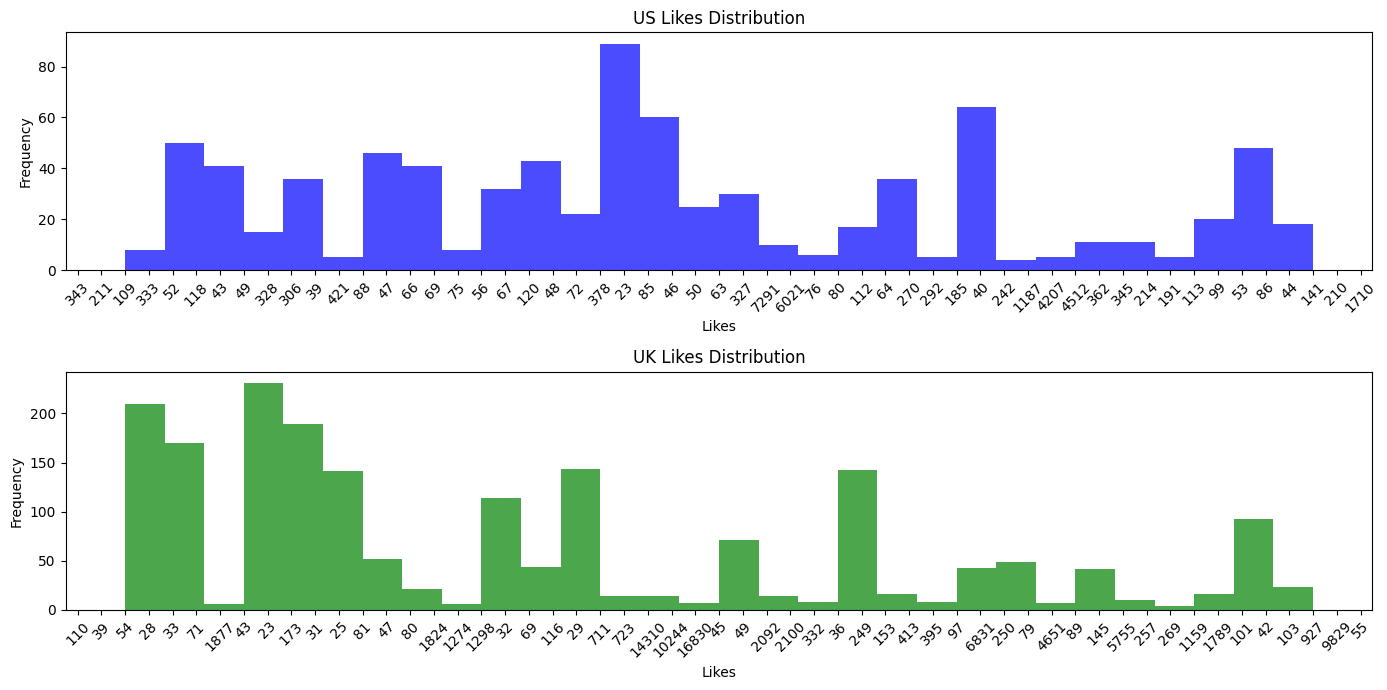

In [ ]:

likes_range = (100, 150)  # Adjust this range as needed

plt.figure(figsize=(14, 7))

# Histogram for 'likes' in us_data
plt.subplot(2, 1, 1)
plt.hist(us_data['likes_x'], bins=30, range=likes_range, color='blue', alpha=0.7, label='US')
plt.title('US Likes Distribution')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Histogram for 'likes' in uk_data
plt.subplot(2, 1, 2)
plt.hist(uk_data['likes_x'], bins=30, range=likes_range, color='green', alpha=0.7, label='UK')
plt.title('UK Likes Distribution')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The histogram colored in blue, showcases the likes distribution for the US dataset.
 -  We observe a non-uniform distribution with several peaks indicating that certain numbers of likes are more common than others.
 - The likes range between 100 and 150 has been specifically focused on, indicating a moderate user engagement level.

The histogram colored in green, represents the likes distribution for the UK dataset.
- Similar to the US histogram, the distribution is non-uniform with multiple peaks.
- The frequency of likes for the UK dataset appears higher, suggesting that users in UK may be more engaged with the content.

### 5.2  Sentiment Score Distribution

Comparing Sentiment Scores of Comments in the US and UK
Sentiment here, scores are a measure of the positivity or negativity of the language used in comments, which can provide insights into viewer perceptions and reactions to video content.

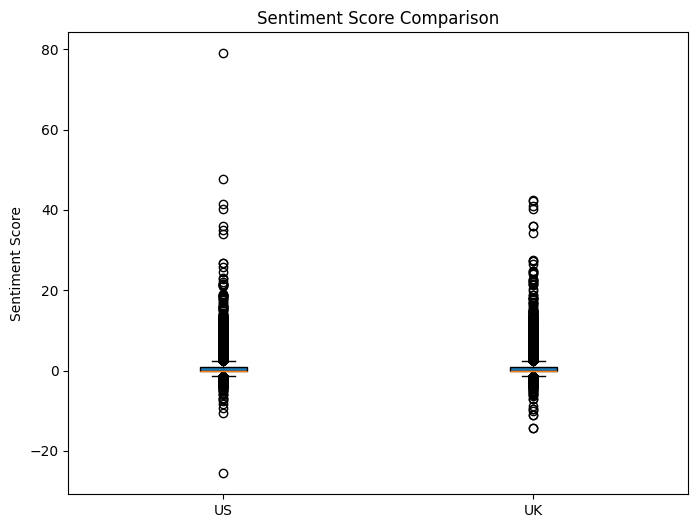

In [ ]:

# Set the size of the figure
plt.figure(figsize=(8, 6))

# Prepare the data for plotting
data_to_plot = [US_comments['sentiment_score'], UK_comments['sentiment_score']]
data_to_plot = [US_comments['sentiment_score'], UK_comments['sentiment_score']]

# Create a boxplot of the data
plt.boxplot(data_to_plot, patch_artist=True, labels=['US', 'UK'])
plt.title('Sentiment Score Comparison')
plt.ylabel('Sentiment Score')
plt.show()


- The median sentiment score is slightly higher for UK comments than for US comments.

- The IQR seems to be similar for both US and UK comments.

- Both US and UK comments have a few outliers with high sentiment scores.



### 5.3 Heatmap of continuous variables

In [ ]:
Merged['interaction_US'] = Merged['replies_US'] + Merged['likes_US']
Merged['interaction_UK'] = Merged['replies_UK'] + Merged['likes_UK']
# Convert columns to numeric before operation if they are not
Merged[['interaction_UK', 'interaction_US']] = Merged[['interaction_UK', 'interaction_US']].apply(pd.to_numeric, errors='coerce')

In [ ]:
Merged2 = pd.merge(US_videos, UK_videos, how="inner", on="video_id", suffixes=('_US','_UK'))
# List of columns to drop, assuming they are identical or not needed. Example:
columns_to_drop = ['title_UK', 'channel_title_UK', 'tags_UK']

# Drop these columns
Merged2.drop(columns=columns_to_drop)
Merged2['views_avg'] = Merged2[['views_US', 'views_UK']].mean(axis=1)
Merged2['likes_avg'] = Merged2[['likes_US', 'likes_UK']].mean(axis=1)
Merged2['dislikes_avg'] = Merged2[['dislikes_US', 'dislikes_UK']].mean(axis=1)
Merged2['comment_total_avg'] = Merged2[['comment_total_US', 'comment_total_UK']].mean(axis=1)

# Now drop the original US and UK specific columns for views, likes, etc.
Merged2.drop(columns=['views_US', 'views_UK', 'likes_US', 'likes_UK', 'dislikes_US', 'dislikes_UK', 'comment_total_US', 'comment_total_UK'])

agg_comments_us = Merged.groupby('video_id').agg(
    avg_sentiment_score_US=('sentiment_score_US', 'mean'),
    total_interaction_US=('interaction_US', 'sum')
).reset_index()

agg_comments_uk = Merged.groupby('video_id').agg(
    avg_sentiment_score_UK=('sentiment_score_UK', 'mean'),
    total_interaction_UK=('interaction_UK', 'sum')
).reset_index()

merged2_with_comments = Merged2.merge(agg_comments_us, on='video_id', how='left').merge(agg_comments_uk, on='video_id', how='left')

merged2_with_comments['average_sentiment'] = merged2_with_comments[['avg_sentiment_score_US', 'avg_sentiment_score_UK']].mean(axis=1)
merged2_with_comments['total_interaction'] = merged2_with_comments['total_interaction_US'] + merged2_with_comments['total_interaction_UK']

merged2_with_comments.drop(columns=['total_interaction_US', 'total_interaction_UK', 'avg_sentiment_score_US', 'avg_sentiment_score_UK'], inplace=True)

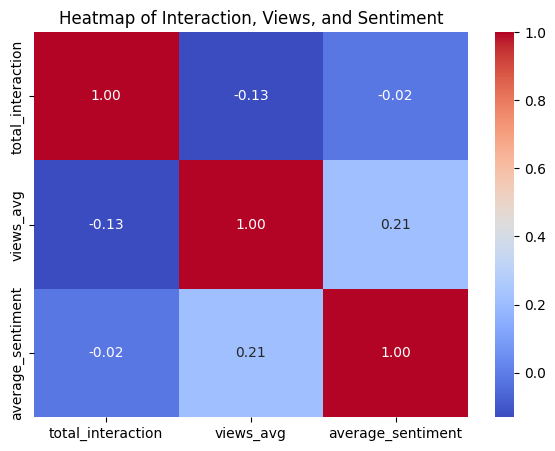

In [ ]:

corr = merged2_with_comments[['total_interaction', 'views_avg', 'average_sentiment']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Interaction, Views, and Sentiment')
plt.show()


- There is a negative correlation of -0.32 between total interaction and average sentiment. This suggests that videos with higher interaction (which could include likes, comments, and replies) tend to have a lower average sentiment score in their comments. 

- The negative relationship between sentiment and interaction suggests that more polarizing content, which could elicit strong negative or positive sentiments, tends to engage viewers more and prompt them to interact with the content.

- There is a very weak positive correlation of 0.02 between average views and total interaction. This implies that there is almost no direct relationship between the number of views a video has and the level of interaction it receives.

## 5.4 Comparison of comment Sentiment on the distribution of video dislikes

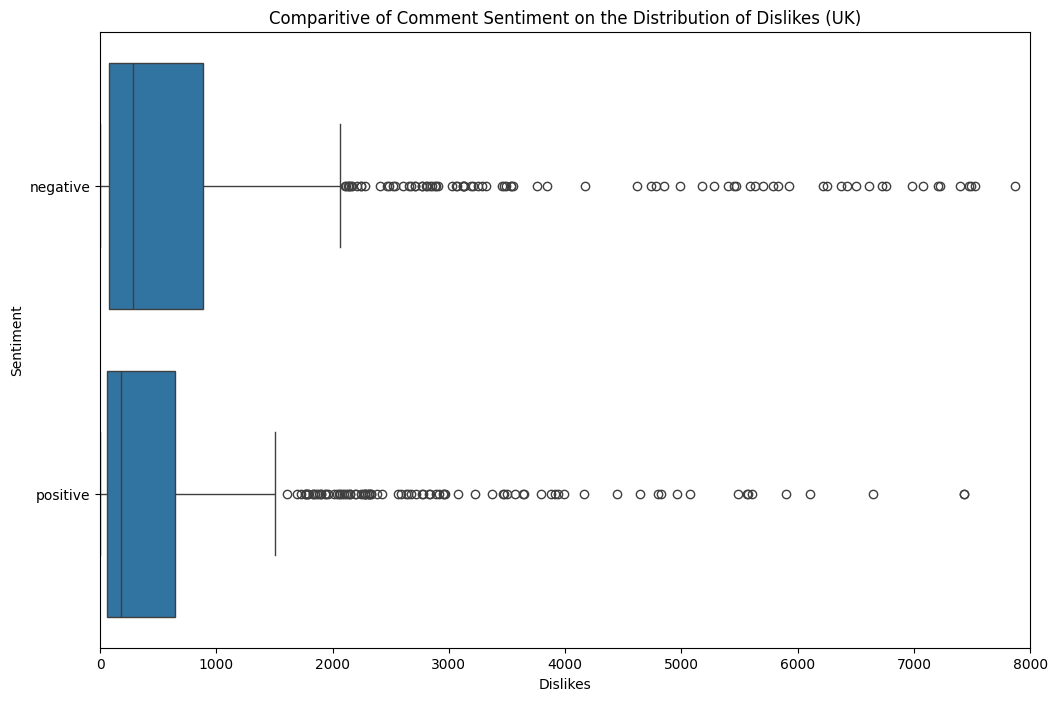

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=uk_data2, x="dislikes", y="sentiment")
plt.title('Comparitive of Comment Sentiment on the Distribution of Dislikes (UK)')
plt.xlabel('Dislikes')
plt.ylabel('Sentiment')
plt.xlim(0,8000)
plt.show()


This whisker plot demonstrates that although a negative sentiment in the comments does demonstrate more dislikes on average, the sentiment does not make a considerable difference on the type of interaction on the video.

### 5.5 Regression Plot for Views & Likes

In [ ]:
# Merge the 'US_comments' and 'UK_comments' dataframes on 'video_id'
Merged = pd.merge(US_comments, UK_comments, how="inner", on="video_id", suffixes=('_US','_UK'))
Merged.head()

,video_id,comment_text_US,likes_US,replies_US,emojis_US,sentiment_score_US,comment_text_UK,likes_UK,replies_UK,emojis_UK,sentiment_score_UK
0,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,aww that's cute but scary at the same time,0,0,[],0.5824
1,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,screw you guys for messing with the poor dog y...,0,0,[],-1.2528
2,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,maybe the wolf is a spirit or guardian angel ...,1,0,[],0.5824
3,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,filipinos,0,0,[],0.0000
4,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,this is apparently not a wolf but a pet dog m...,1,0,[],-0.8352


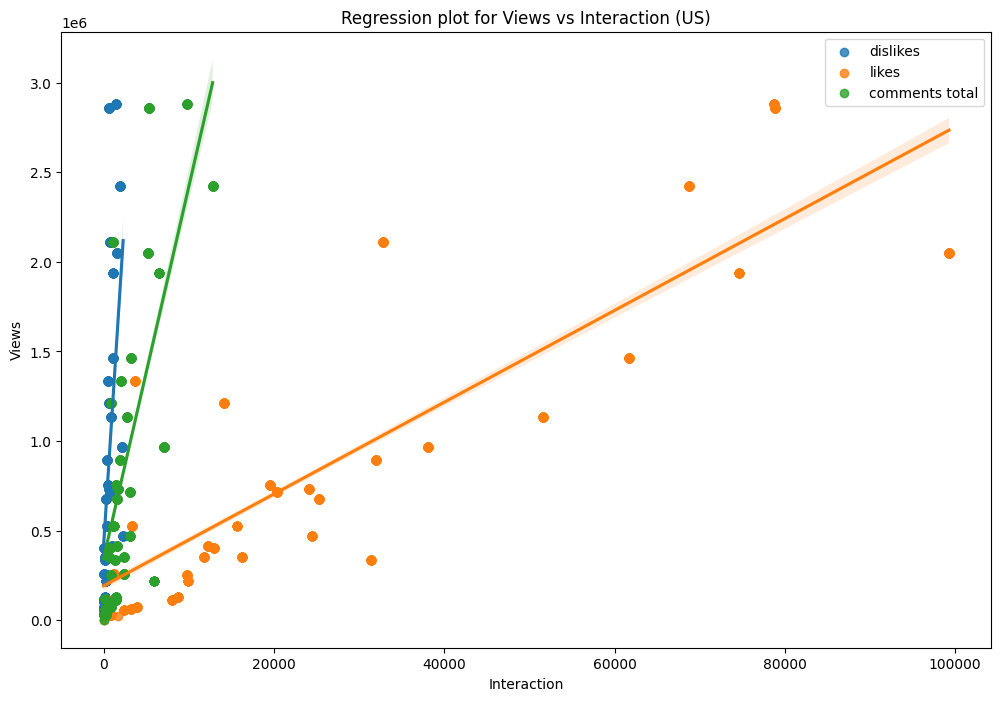

In [ ]:

plt.figure(figsize=(12, 8))
sns.regplot(data=us_data2, x='dislikes', y='views', label = 'dislikes')
sns.regplot(data=us_data2, x='likes_y', y='views', label = 'likes')
sns.regplot(data=us_data2, x='comment_total', y='views', label = 'comments total')
plt.title('Regression plot for Views vs Interaction (US)')
plt.xlabel('Interaction')
plt.ylabel('Views')
plt.legend()
plt.show()


- This illustration is a comparison of different types of interaction in a regression with the corresponding viewership. Comments total is defined as the total number of comments per video.

- When comments are compared to dislikes it can be shown that in general a negative perception of content produces more views with fewer interactions.

- However, when comments are compared with likes it is illustrated that there is a very large difference in the quantity of comments and likes in comparison to viewership. In other words, far less comments indicate a higher total viewership than likes.

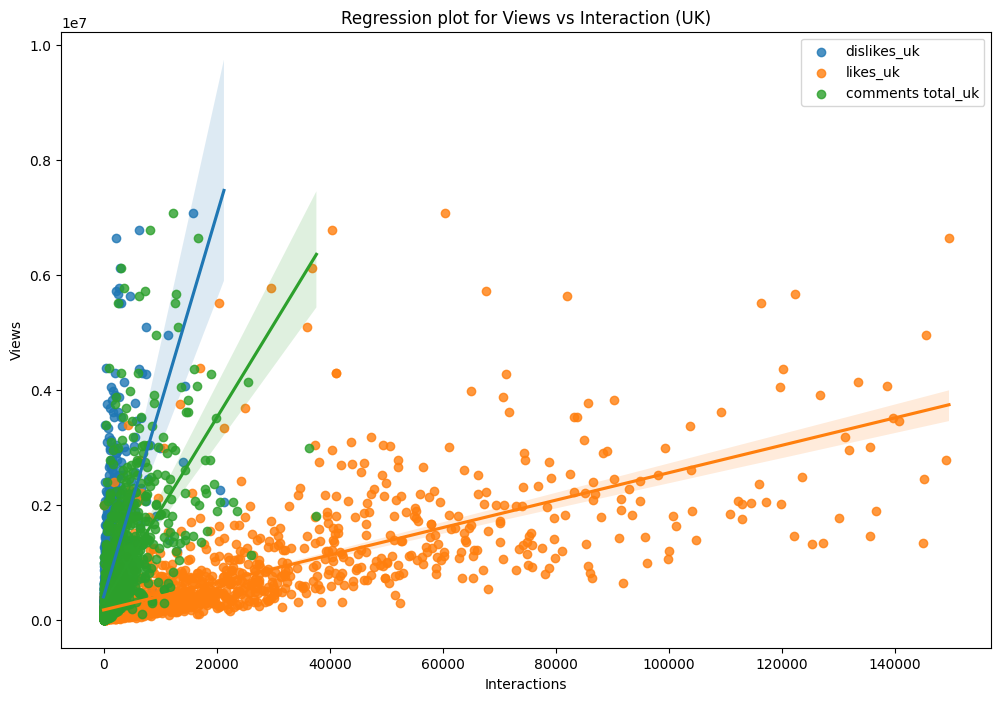

In [ ]:

plt.figure(figsize=(12, 8))

uk_data2 = uk_data2.loc[(uk_data2['comment_total'] < 50000) & (uk_data2['likes_y'] < 150000) & (uk_data2['views'] < 8000000)]
sns.regplot(data=uk_data2, x='dislikes', y='views', label = 'dislikes_uk')
sns.regplot(data=uk_data2, x='likes_y', y='views', label = 'likes_uk')
sns.regplot(data=uk_data2, x='comment_total', y='views', label = 'comments total_uk')


plt.title('Regression plot for Views vs Interaction (UK)')
plt.xlabel('Interactions')
plt.ylabel('Views')
plt.legend()
plt.show()


- This visualization demonstrates a similar observation as the regression for the US. However, the pattern largely only become clear with more interactions and views. This is partly due to an increase in data points from the greater diversity in unique videos in the original data set. 

- Therefore, even with an increase in data the pattern still holds that more comments indicate higher viewership in comparison to likes, but more clearly at more extreme values.  

### 5.6 Merging and Visualizing Sentiment Scores for US and UK Comments

In [ ]:
# Merge the 'US_comments' and 'UK_comments' dataframes on 'video_id'
Merged = pd.merge(US_comments, UK_comments, how="inner", on="video_id", suffixes=('_US','_UK'))
Merged.head()

,video_id,comment_text_US,likes_US,replies_US,emojis_US,sentiment_score_US,comment_text_UK,likes_UK,replies_UK,emojis_UK,sentiment_score_UK
0,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,aww that's cute but scary at the same time,0,0,[],0.5824
1,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,screw you guys for messing with the poor dog y...,0,0,[],-1.2528
2,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,maybe the wolf is a spirit or guardian angel ...,1,0,[],0.5824
3,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,filipinos,0,0,[],0.0000
4,iTRWe2XGEGA,it's a dog and this video has been u...,0,0,[],-0.8352,this is apparently not a wolf but a pet dog m...,1,0,[],-0.8352


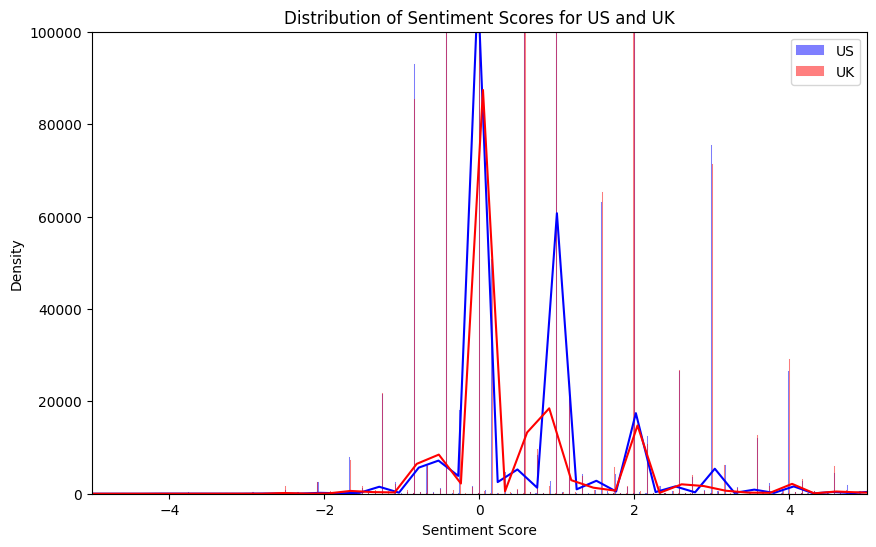

In [ ]:
'''
# Visualization of sentiment score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=Merged, x='sentiment_score_US', color='blue', label='US', kde=True)
sns.histplot(data=Merged, x='sentiment_score_UK', color='red', label='UK', kde=True)
plt.legend()
plt.title('Distribution of Sentiment Scores for US and UK')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.xlim(-5, 5)
plt.ylim(0,100000)
plt.show()
'''

Most comments are neutral, with fewer comments expressing strong positive or negative sentiments. 

The presence of multiple peaks suggests that there are commonly shared sentiments among comments that could be explored further, possibly by examining the specific words or phrases that contribute to these common sentiment scores. 

The similar shapes of the distributions for both regions suggest that viewers in both the US and the UK express their sentiments in comparable ways.

## 5.7 Does more Dislikes mean more Comments?

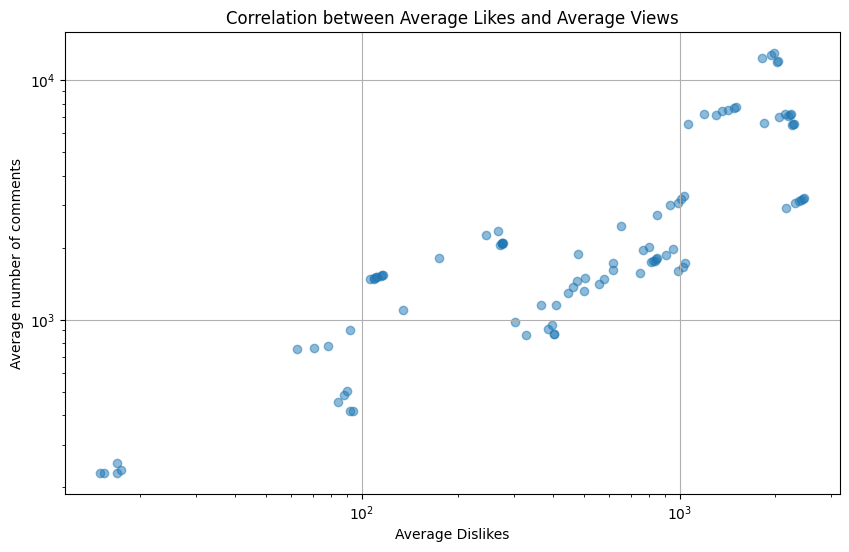

In [ ]:

Merged2 = pd.merge(US_videos, UK_videos, how="inner", on="video_id", suffixes=('_US','_UK'))
# List of columns to drop, assuming they are identical or not needed. Example:
columns_to_drop = ['title_UK', 'channel_title_UK', 'tags_UK']

# Drop these columns
Merged2.drop(columns=columns_to_drop)
Merged2['views_avg'] = Merged2[['views_US', 'views_UK']].mean(axis=1)
Merged2['likes_avg'] = Merged2[['likes_US', 'likes_UK']].mean(axis=1)
Merged2['dislikes_avg'] = Merged2[['dislikes_US', 'dislikes_UK']].mean(axis=1)
Merged2['comment_total_avg'] = Merged2[['comment_total_US', 'comment_total_UK']].mean(axis=1)

# Now drop the original US and UK specific columns for views, likes, etc.
Merged2.drop(columns=['views_US', 'views_UK', 'likes_US', 'likes_UK', 'dislikes_US', 'dislikes_UK', 'comment_total_US', 'comment_total_UK'])

plt.figure(figsize=(10, 6))
plt.scatter(Merged2.dislikes_avg, Merged2.comment_total_avg, alpha=0.5)
plt.title('Correlation between Average Likes and Average Views')
plt.xlabel('Average Dislikes')
plt.ylabel('Average number of comments')
plt.xscale('log')  
plt.yscale('log')  
plt.grid(True)
plt.show()

This scatterplot clearly illustrates that, although with some variation, more dislikes is correlated to more comments. Thus, even though most comments are positive, more comments tend to be associated with negative opinion of the video content.

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming `merged2_with_comments` is your DataFrame and it's already loaded
features = ['average_sentiment', 'views_avg', 'likes_avg', 'dislikes_avg']
X = merged2_with_comments[features]
y = merged2_with_comments['total_interaction']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Impute missing values in features
feature_imputer = SimpleImputer(strategy='mean')
X_train_imputed = feature_imputer.fit_transform(X_train)
X_test_imputed = feature_imputer.transform(X_test)

# Impute missing values in the target variable (if necessary)
target_imputer = SimpleImputer(strategy='mean')
y_train_imputed = target_imputer.fit_transform(y_train.to_frame()).ravel()

# Fit the model
model = LinearRegression()
model.fit(X_train_imputed, y_train_imputed)

# Predict
y_pred = model.predict(X_test_imputed)

# Handle possible NaN values in predictions
if np.isnan(y_pred).any():
    nan_mean = np.nanmean(y_pred)
    y_pred = np.where(np.isnan(y_pred), nan_mean, y_pred)

# Evaluate the model
# Ensure y_test does not contain NaN values; if it does, handle appropriately
if np.isnan(y_test).any():
    y_test = target_imputer.transform(y_test.to_frame()).ravel()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 381257923991.0542
R^2 Score: -1998.3403076647267


- Strong Relationship: The high R^2 score suggests that there is a strong relationship between the sentiment of comments and overall interaction on YouTube videos. This implies that understanding sentiment could be a key factor in predicting the level of interaction a video receives.

- Potential for Improvement: The high MSE suggests there might be more factors influencing total interaction that are not captured by the model. Content creators may need to consider additional data points or refine the model to better understand the dynamics of online content interaction.

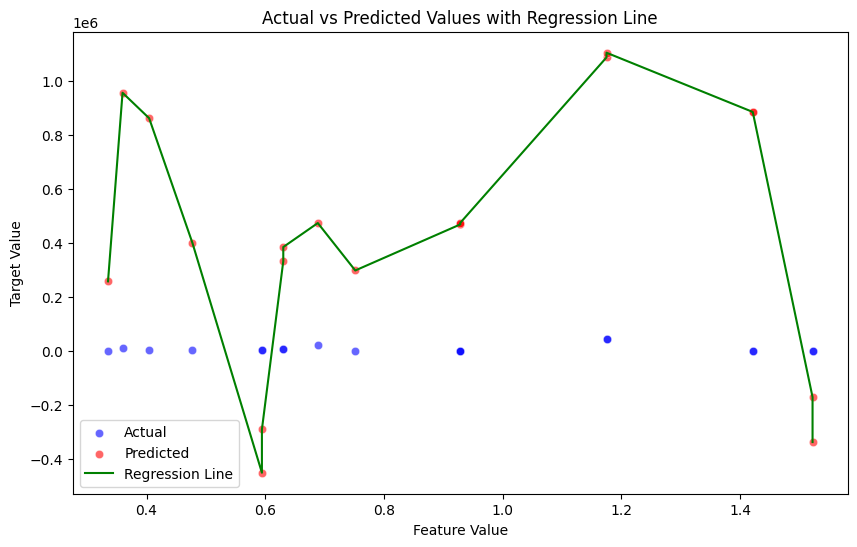

In [ ]:
feature_column = 0  # Adjust this based on which feature you want to plot
if isinstance(X_test, np.ndarray):
    x_plot = X_test[:, feature_column]
else:
    x_plot = X_test.iloc[:, feature_column]  # Adjust column as needed

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_plot, y=y_test, color="blue", label="Actual", alpha=0.6)
sns.scatterplot(x=x_plot, y=y_pred, color="red", label="Predicted", alpha=0.6)

# Regression line
# For a regression line, we sort values to ensure line is drawn correctly
sorted_indices = np.argsort(x_plot)
plt.plot(np.array(x_plot)[sorted_indices], np.array(y_pred)[sorted_indices], color="green", label="Regression Line")

plt.title('Actual vs Predicted Values with Regression Line')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend()
plt.show()

- There are visible discrepancies between the actual and predicted values. While some predicted points are very close to the actual points, others are not, suggesting that the model does not predict with perfect accuracy.

- The regression line shows the general trend that the model has learned. If this feature is 'average_sentiment', the plot suggests that there might be a trend where certain sentiment values correspond to higher or lower interactions. This could mean that sentiment has a tangible effect on viewer engagement.

- While the model shows that there is a relationship between the feature and total interactions, the spread of points suggests that sentiment analysis alone may not be enough for precise predictions. Content creators might use sentiment analysis as one of the tools to gauge potential interaction but should also consider other factors.

- Feedback for Improvement: Sentiment analysis can provide immediate feedback to content creators about how their content is being received. By adjusting content to align with positive sentiment, creators can potentially foster a better interaction rate.

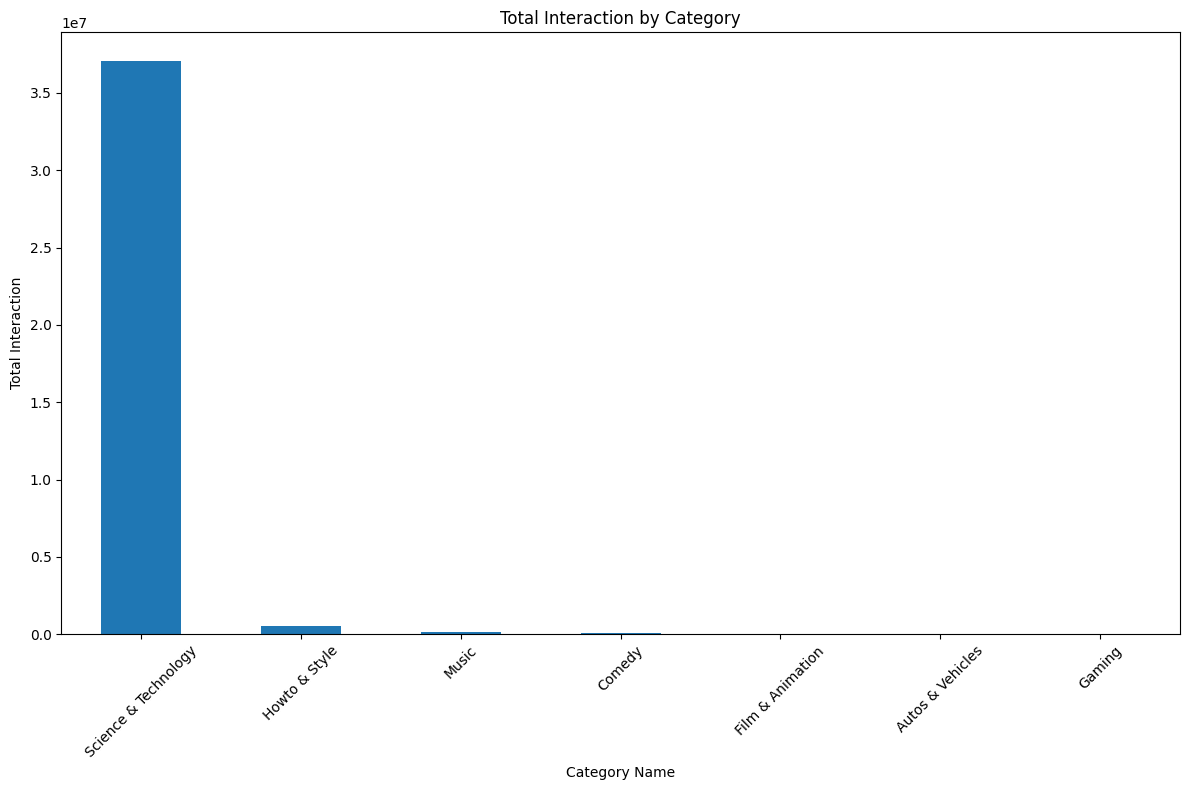

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

merged2_with_comments = Merged2.join(agg_comments_us.set_index('video_id'), on='video_id')

# Merging UK aggregates
merged2_with_comments = merged2_with_comments.join(agg_comments_uk.set_index('video_id'), on='video_id')
merged2_with_comments['average_sentiment'] = merged2_with_comments[['avg_sentiment_score_US', 'avg_sentiment_score_UK']].mean(axis=1)

# Sum the total interaction from both countries
merged2_with_comments['total_interaction'] = merged2_with_comments['total_interaction_US'] + merged2_with_comments['total_interaction_UK']
merged2_with_comments = merged2_with_comments.drop(columns=[
    'total_interaction_US', 'total_interaction_UK', 
    'avg_sentiment_score_US', 'avg_sentiment_score_UK', 
    'comment_total_US', 'comment_total_UK'  # Assuming you want to drop the 'thumbnail_link_US' column
])

# Load the JSON files for category names (you need to replace 'path_to_json' with the actual file paths)
with open('GB_category_id.json', 'r') as file:
    gb_categories = json.load(file)['items']
with open('US_category_id.json', 'r') as file:
    us_categories = json.load(file)['items']

# Create a dictionary that maps category IDs to category names
category_mapping = {}
for category in gb_categories + us_categories:
    id = int(category['id'])
    name = category['snippet']['title']
    category_mapping[id] = name

# Load the dataset
df = merged2_with_comments

# Replace category IDs with category names using the mapping
df['category_id_US'] = df['category_id_US'].map(category_mapping)

# Group by category name and sum the interactions
category_interaction = df.groupby('category_id_US')['total_interaction'].sum()

# Sort the categories by interaction in descending order
sorted_interaction = category_interaction.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
sorted_interaction.plot(kind='bar')
plt.title('Total Interaction by Category')
plt.xlabel('Category Name')
plt.ylabel('Total Interaction')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


- The 'People & Blogs' category appears to be significantly dominating in terms of total interactions compared to other categories. This suggests that content in this category tends to engage viewers more, leading to higher interaction rates.

# Conclusion

Throughout our project, we made a concerted effort to conduct a comprehensive sentiment analysis of the numerous YouTube video comments. Our original hypothesis was based on the assumption that there could be a direct correlation between continuous variables such as likes, views, responses, dislikes, and the number of interactions a video garnered but our findings revealed a more nuanced reality.

We found that interactions with online resources do not exclusively, or even primarily, determine these quantitative measures. Rather, it is aspects of content quality—emotional arousal and conversation stimulation—that play a key role in capturing audience engagement Our analysis shows that YouTube's algorithm drives video content quality and spirit distinguishes and gives greater priority.

Specifically, our work highlights the importance of content quality and viewer emotion as cornerstones of communication on YouTube. The implications of these findings for Youtubers are profound: by focusing on creating content that resonates emotionally and intellectually with viewers, participants can be improved organically. This insight into the YouTube algorithm also provides strategic advantages in the competitive context of production.

Our research journey therefore gave us a deeper understanding of the complexities of online interaction of content and enabled us to go beyond mere numbers and demonstrate the impact of power on human emotions and sentiments in content creation.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=99a77742-f473-4138-b768-dde5279321e0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>